In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
seaborn.set()
%matplotlib inline

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")
del data["Channel"]
del data["Region"]
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [ ]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
inertia = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=1234)
  kmeans.fit(data)
  inertia.append((i,kmeans.inertia_,))

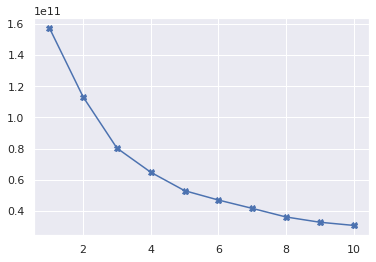

In [ ]:
plt.plot([w[0] for w in inertia],[w[1] for w in inertia],marker="X")

In [ ]:
kmeans = KMeans(n_clusters=5, init='random', n_init=50, random_state=1234)
kmeans.fit(data)
cluster_list = kmeans.labels_

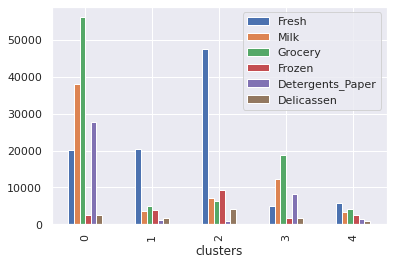

In [ ]:
data["clusters"] = cluster_list
data.groupby("clusters").aggregate("mean").plot.bar()